Time Series Forcasting with LSTM model

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
#importing the necessary packages
import pandas
import matplotlib.pyplot as plt
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

Using TensorFlow backend.


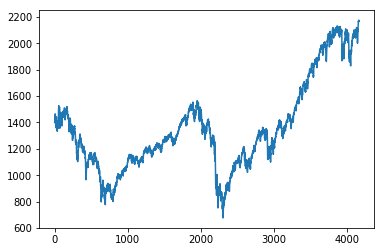

2791 1376


In [3]:
dataset = pandas.read_csv('sp500.csv', usecols=[0], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

In [4]:

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

2791 1376


In [5]:
print(dataset)

[[ 0.48240909]
 [ 0.48420417]
 [ 0.48509838]
 ..., 
 [ 0.99562893]
 [ 0.99609603]
 [ 0.99436106]]


In [6]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [7]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [8]:
trainX.shape

(2789, 1)

In [9]:
print(trainX.shape)

(2789, 1)


In [10]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
5s - loss: 0.0414
Epoch 2/100
2s - loss: 0.0095
Epoch 3/100
2s - loss: 0.0069
Epoch 4/100
2s - loss: 0.0041
Epoch 5/100
3s - loss: 0.0017
Epoch 6/100
3s - loss: 4.4952e-04
Epoch 7/100
2s - loss: 1.3728e-04
Epoch 8/100
2s - loss: 1.0282e-04
Epoch 9/100
2s - loss: 1.0066e-04
Epoch 10/100
2s - loss: 1.0113e-04
Epoch 11/100
2s - loss: 1.0069e-04
Epoch 12/100
2s - loss: 1.0173e-04
Epoch 13/100
2s - loss: 1.0100e-04
Epoch 14/100
2s - loss: 1.0123e-04
Epoch 15/100
2s - loss: 1.0168e-04
Epoch 16/100
2s - loss: 1.0134e-04
Epoch 17/100
3s - loss: 1.0305e-04
Epoch 18/100
3s - loss: 1.0185e-04
Epoch 19/100
2s - loss: 1.0321e-04
Epoch 20/100
2s - loss: 1.0236e-04
Epoch 21/100
2s - loss: 1.0242e-04
Epoch 22/100
2s - loss: 1.0214e-04
Epoch 23/100
2s - loss: 1.0493e-04
Epoch 24/100
2s - loss: 1.0274e-04
Epoch 25/100
2s - loss: 1.0207e-04
Epoch 26/100
3s - loss: 1.0290e-04
Epoch 27/100
3s - loss: 1.0291e-04
Epoch 28/100
2s - loss: 1.0274e-04
Epoch 29/100
2s - loss: 1.0243e-04
Epoch 30/100
3

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 15.19 RMSE
Test Score: 65.64 RMSE


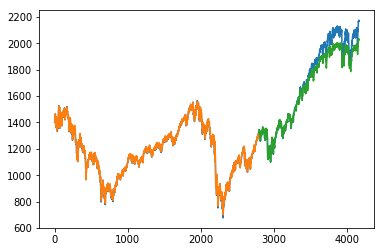

In [13]:

# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()